In [1]:
#The accuracy is lower than I would like because my laptop can't handle more epochs. In addition, I wasn't able to run all
#all the way through. While this was supposed to run for 3 hours, with a few minutes per epoch, it takes more than 10
#minutes, which means I couldn't run all the way.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, experimental, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.data import Dataset
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed
from tensorflow.keras.utils import to_categorical
from tensorflow import test
import random

/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,23705.0,33.300907,19.885708,1.0,23.0,29.0,45.0,116.0
ethnicity,23705.0,1.269226,1.345638,0.0,0.0,1.0,2.0,4.0
gender,23705.0,0.477283,0.499494,0.0,0.0,0.0,1.0,1.0


In [6]:
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

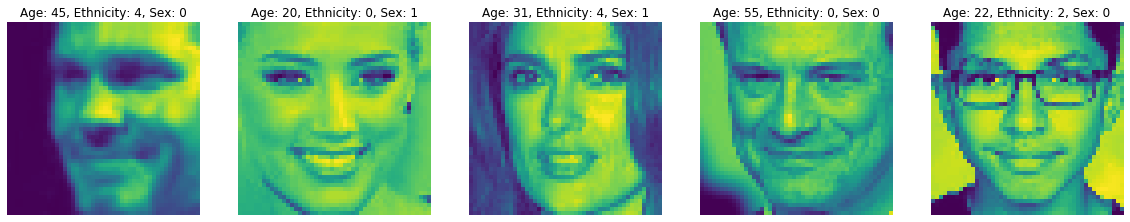

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(df))
    
    age = df['age'][random_face]
    ethnicity = df['ethnicity'][random_face]
    gender = df['gender'][random_face]
    
    axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(df['pixels'][random_face])
    axes[i].axis('off')

In [10]:
X = np.array(df['pixels'].to_list())
X = X.reshape(X.shape[0], 48, 48, 1)

if np.max(X) > 1:
    X = X / 255.0

In [11]:
input_shape = X.shape[1:] 

n_epochs = 16
batch_size = 64

In [12]:
y = df['age'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 128)       0

In [14]:
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), ReduceLROnPlateau(patience=2, verbose=1)]

In [17]:
history = age_model.fit(X_train, y_train, epochs=16, batch_size=batch_size, callbacks=callbacks, validation_data=(X_test, y_test))

Epoch 1/16
297/297 [==============================] - 905s 3s/step - loss: 113.2946 - val_loss: 261.5936
Epoch 2/16
297/297 [==============================] - 856s 3s/step - loss: 102.8804 - val_loss: 248.6953
Epoch 3/16
297/297 [==============================] - 763s 3s/step - loss: 93.7241 - val_loss: 189.2956
Epoch 4/16
297/297 [==============================] - 689s 2s/step - loss: 88.6422 - val_loss: 100.4462
Epoch 5/16
297/297 [==============================] - 686s 2s/step - loss: 84.3679 - val_loss: 80.4725
Epoch 6/16
297/297 [==============================] - 688s 2s/step - loss: 79.9917 - val_loss: 386.8506
Epoch 7/16
297/297 [==============================] - 705s 2s/step - loss: 79.0093 - val_loss: 98.9176

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 8/16
297/297 [==============================] - 725s 2s/step - loss: 64.5143 - val_loss: 63.8714
Epoch 9/16
297/297 [==============================] - 699s 2s/step - loss: 59.8951 - va

149/149 [==============================] - 46s 308ms/step - loss: 1395.5005


ValueError: y_true and y_pred have different number of output (5!=1)

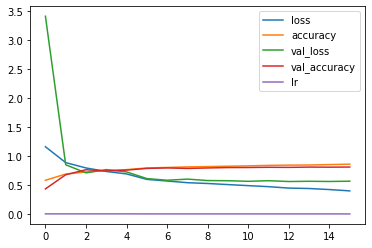

In [37]:
from sklearn.metrics import mean_absolute_error
pd.DataFrame(history.history).plot()
valid_score = age_model.evaluate(X_test, y_test, verbose=1)

y_pred = age_model.predict(X_test)
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test);

In [ ]:
y = df['gender'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

gender_model.summary()

In [ ]:
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
history = gender_model.fit(X_train, y_train, epochs=16, batch_size=batch_size, callbacks=callbacks, validation_data=(X_test, y_test))

In [ ]:
y_pred = gender_model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0])

In [ ]:
X_fp = X_test[(y_pred == 1) & (y_test == 0)] 

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fp))
    
    axes[i].imshow(X_fp[random_choice].reshape(48, 48))
    axes[i].axis('off')
    
X_fn = X_test[(y_pred == 0) & (y_test == 1)]  

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fn))
    axes[i].imshow(X_fn[random_choice].reshape(48, 48))
    axes[i].axis('off')

In [ ]:
y = df['ethnicity'].values

y = to_categorical(y, 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ethnicity_model = Sequential()

ethnicity_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2)))
ethnicity_model.add(BatchNormalization())

ethnicity_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2)))
ethnicity_model.add(BatchNormalization())

ethnicity_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
ethnicity_model.add(MaxPooling2D(pool_size=(2,2)))
ethnicity_model.add(Dropout(0.5))
ethnicity_model.add(BatchNormalization())

ethnicity_model.add(Flatten())
ethnicity_model.add(Dense(128, activation='relu'))
ethnicity_model.add(Dropout(0.5))
ethnicity_model.add(Dense(5, activation='softmax'))  

ethnicity_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

ethnicity_model.summary()

In [ ]:
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
history = ethnicity_model.fit(X_train, y_train, epochs=16, batch_size=batch_size, callbacks=callbacks, validation_data=(X_test, y_test))

In [ ]:
valid_score = ethnicity_model.evaluate(X_test, y_test, verbose=1)

In [ ]:
y_pred = ethnicity_model.predict_classes(X_test)

y_test_labels = [np.argmax(i) for i in y_test]

print(classification_report(y_test_labels, y_pred))

In [ ]:
cm = confusion_matrix(y_test_labels, y_pred)
np.fill_diagonal(cm, 0)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens');

In [ ]:
def face_prediction(image):
    
    x = image.reshape(1, 48, 48, 1)
    x = x / 255.0
    
    age_predict = int(age_model.predict(x))
    gender_predict = int(gender_model.predict_classes(x))
    ethnicity_predict = int(ethnicity_model.predict_classes(x))
    
    gender = {0: 'Male', 1: 'Female'}
    ethnicity_group = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Other'} 
    
    plt.imshow(image)
    plt.title('{0}, {1}, {2}'.format(age_predict, gender[gender_predict], ethnicity_group[ethnicity_predict]))
    plt.axis('off')

In [ ]:
random_face = np.random.choice(len(df))

age = df['age'][random_face]
ethnicity = df['ethnicity'][random_face]
gender = df['gender'][random_face]

plt.imshow(df['pixels'][random_face])
plt.title('Age: {0}, Sex: {1}, Ethnicity: {2},'.format(age, gender, ethnicity))
plt.axis('off');

face_prediction(df['pixels'][random_face])